# Preprocessing

In [6]:
from pathlib import Path 
import librosa 
import librosa.display
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [7]:
path = %pwd
path = Path(f'{path}/../data/lydfiler')

In [8]:
classes = ['blink','kork','skive']

In [9]:
def get_filename(path):
    return os.path.basename(path)

## Melspectogram

The following two methods are from the tutorial <i>Audio Classification using DeepLearning for Image Classification</i>: https://dzlab.github.io/jekyll/update/2018/11/13/audio-classification/

In [10]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, sr=None)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    plt.show()
    plt.draw()
    fig1.savefig(image_fname, bbox_inches='tight', pad_inches=0 ,dpi=100)

In [11]:
def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for audio_path in audio_dir_path.iterdir():
        audio_filename = get_filename(audio_path)
        image_fname = audio_filename.split('.')[0] + '.png'
        if not image_dir_path.exists():
            os.mkdir(image_dir_path)
        
        image_fname = image_dir_path.as_posix() + '/' + image_fname
        if Path(image_fname).exists(): continue
        try:
            save_spectrogram(audio_path.as_posix(), image_fname)
        except ValueError as verr:
            print('Failed to process %s %s' % (image_fname, verr))

In [12]:
train_path_melspectogram  = path/'../train_melspecs'
if not train_path_melspectogram.exists(): 
    os.mkdir(train_path_melspectogram)

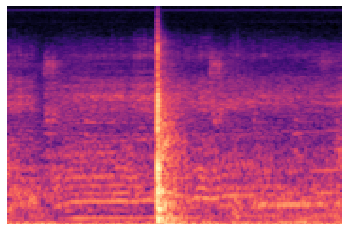

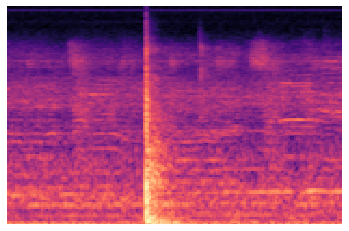

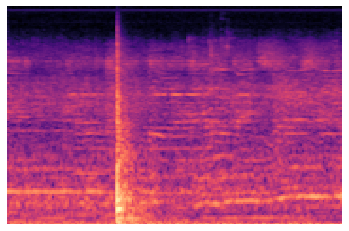

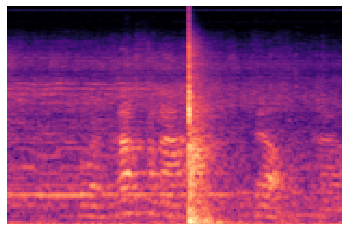

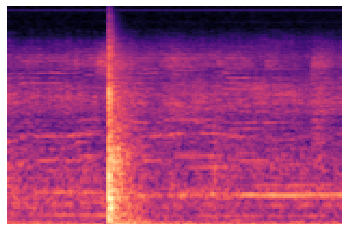

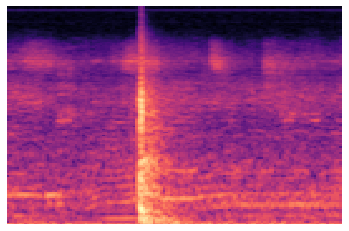

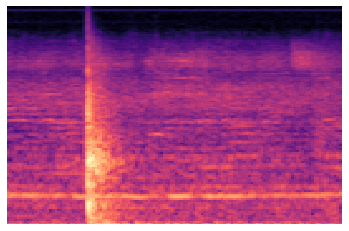

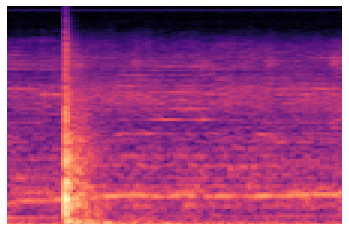

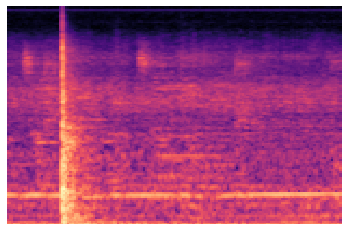

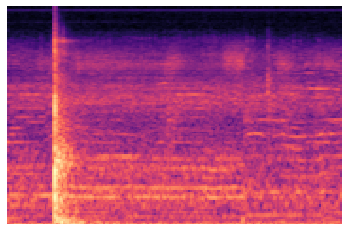

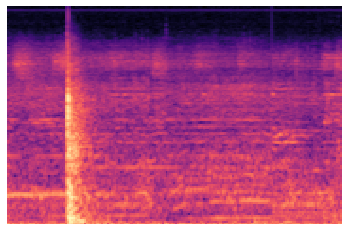

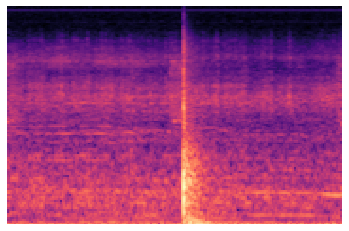

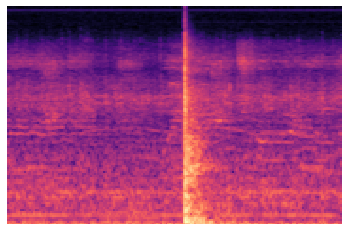

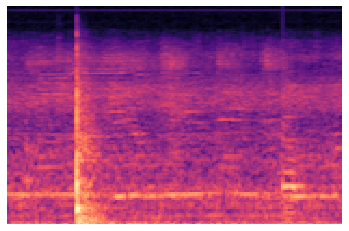

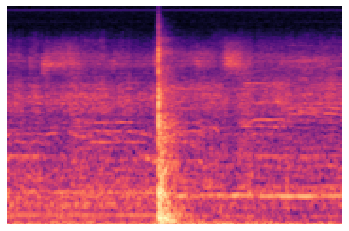

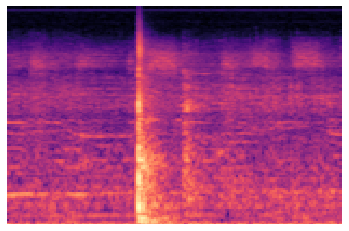

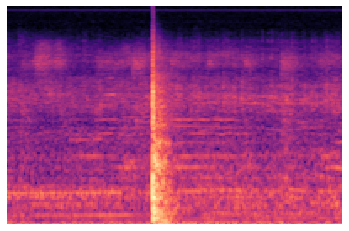

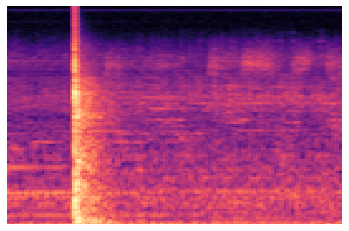

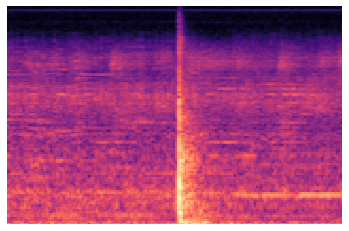

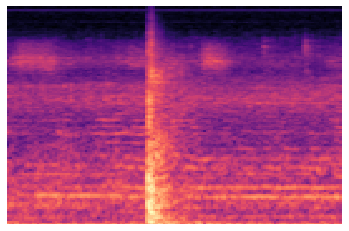

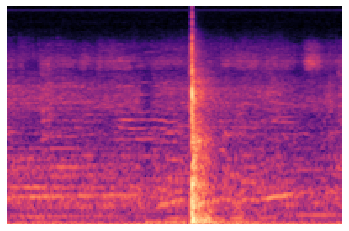

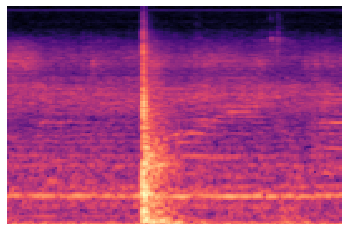

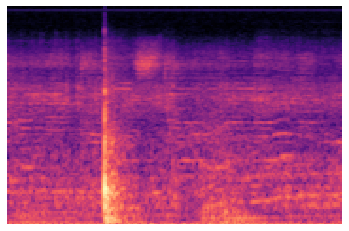

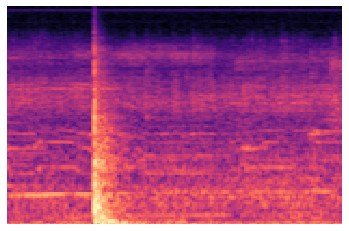

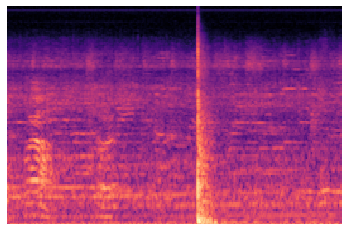

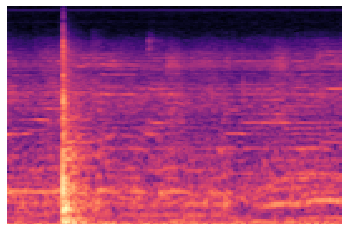

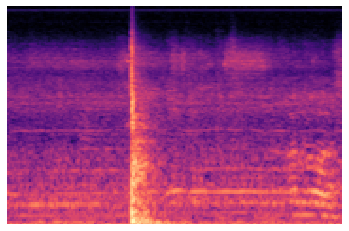

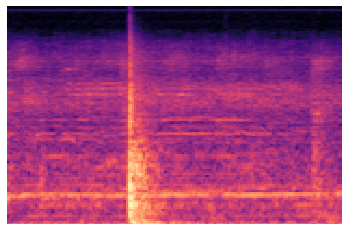

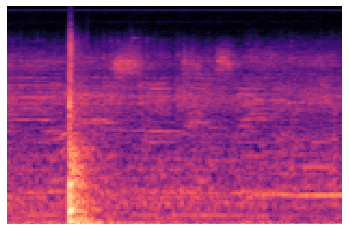

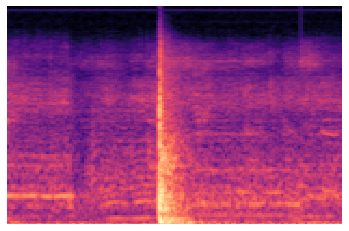

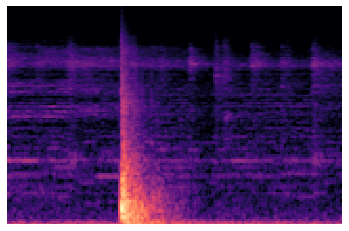

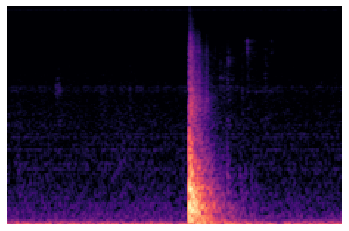

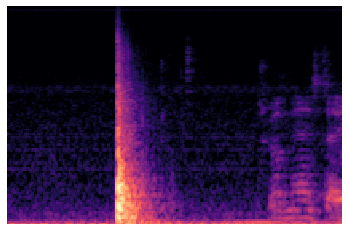

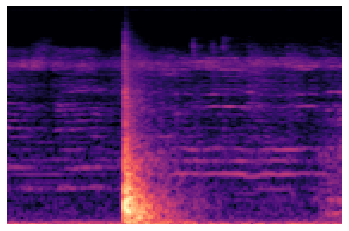

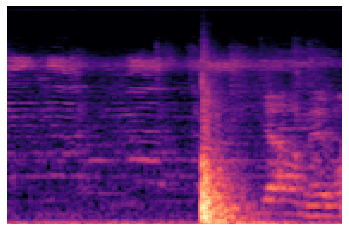

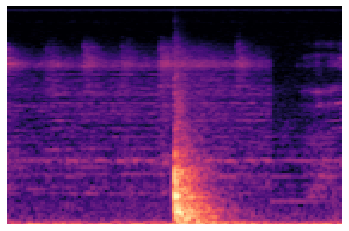

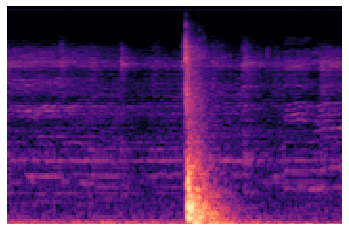

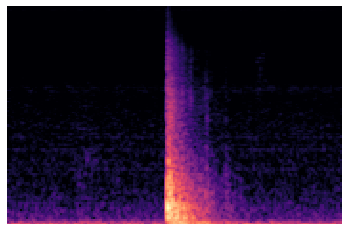

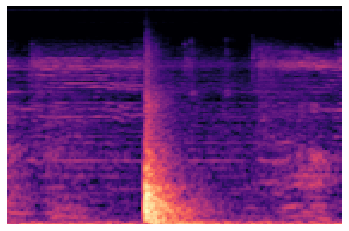

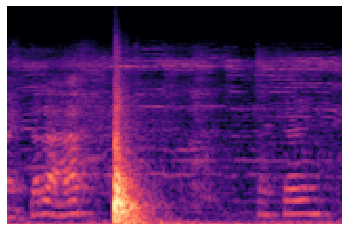

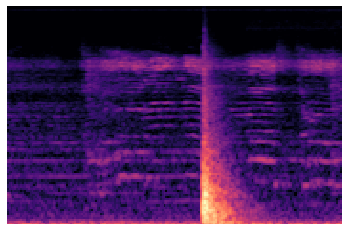

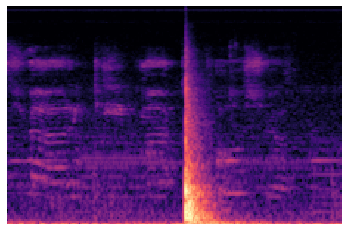

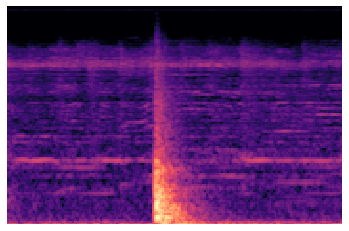

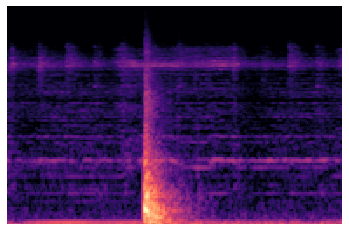

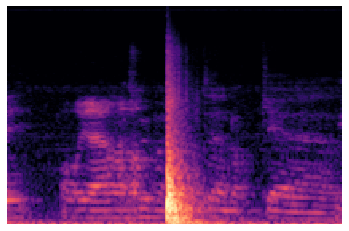

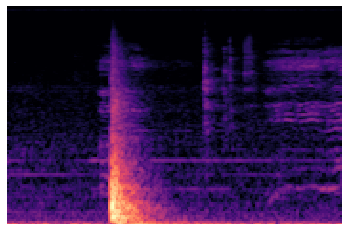

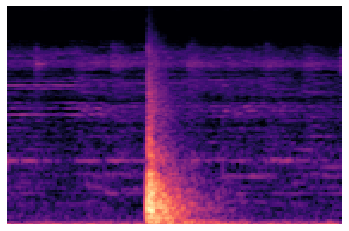

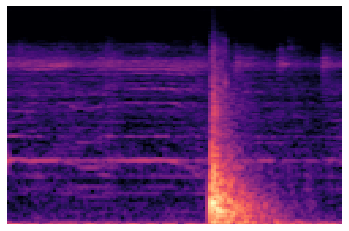

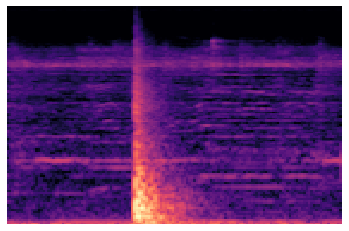

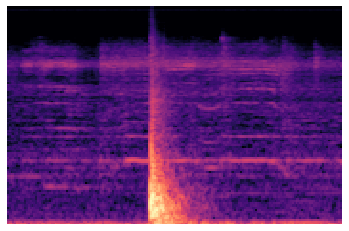

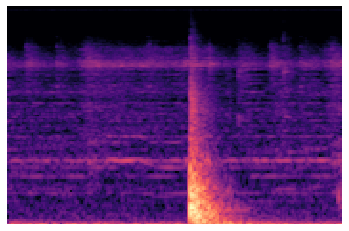

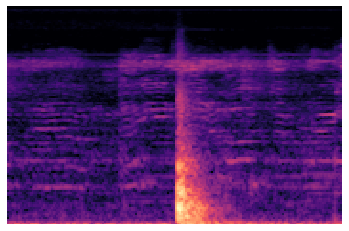

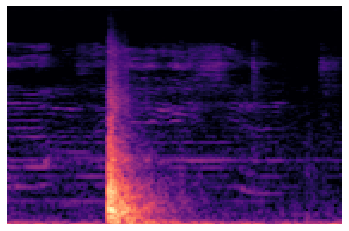

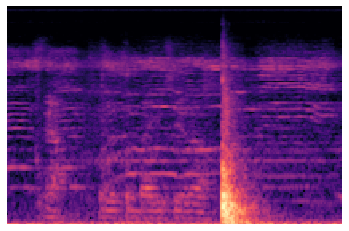

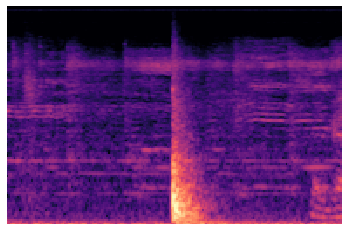

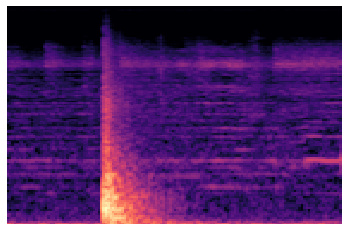

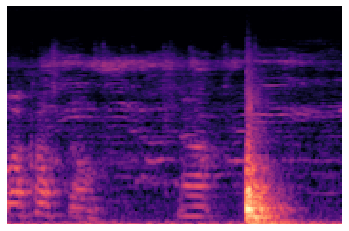

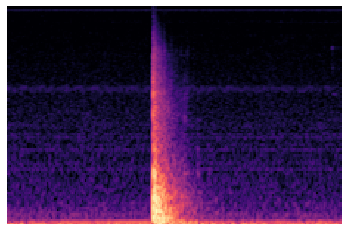

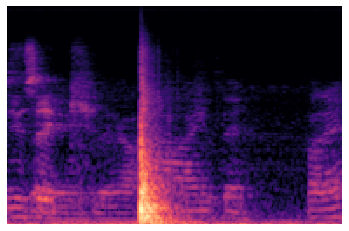

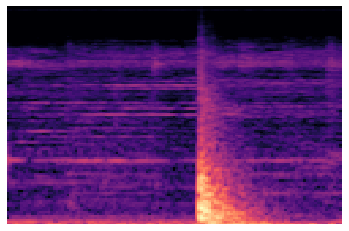

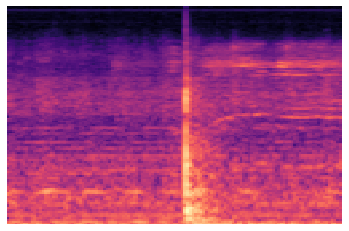

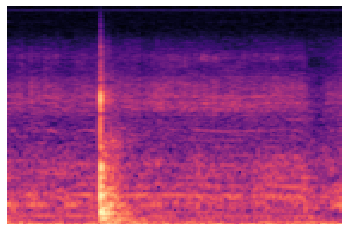

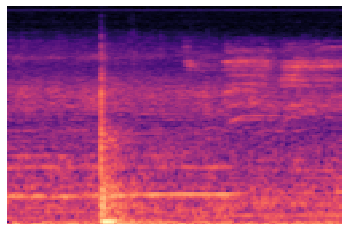

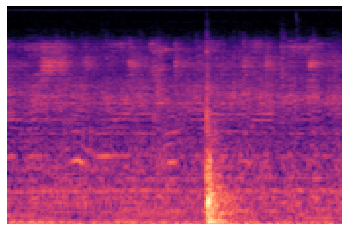

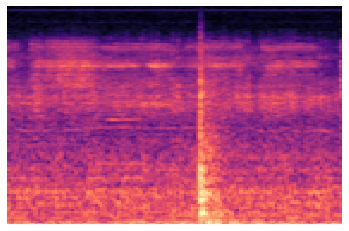

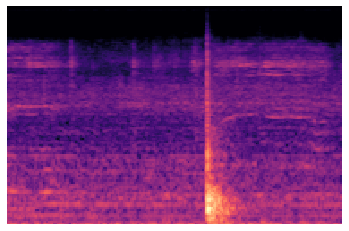

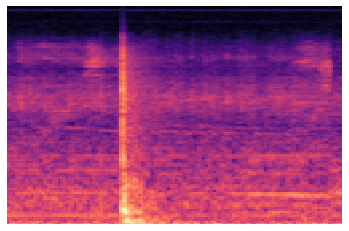

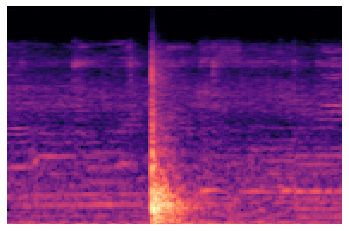

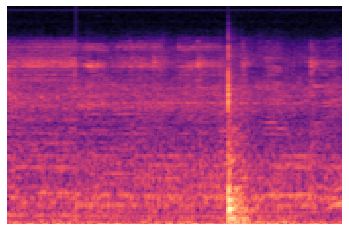

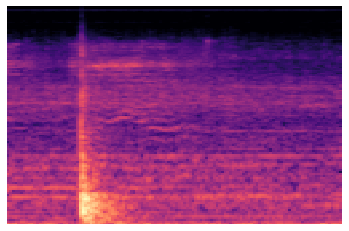

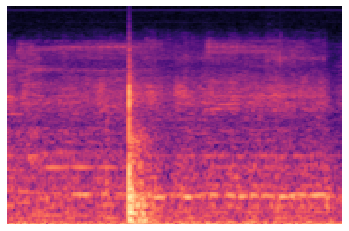

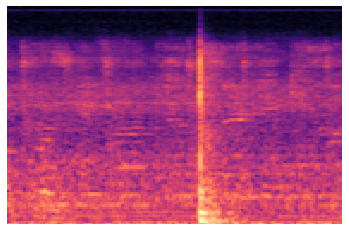

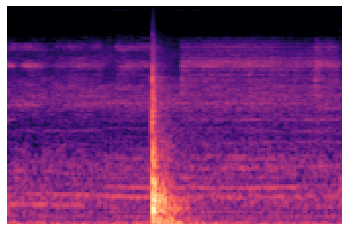

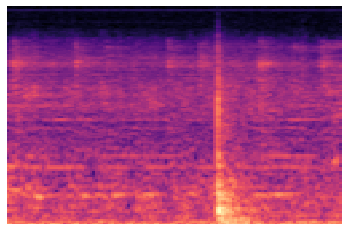

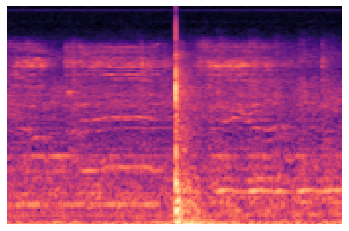

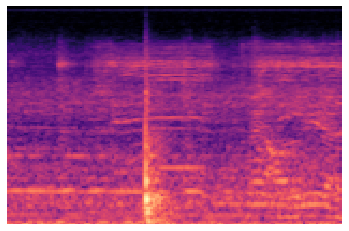

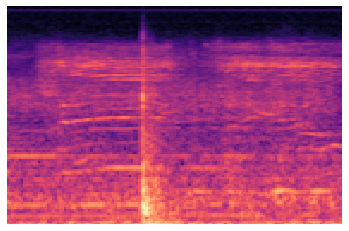

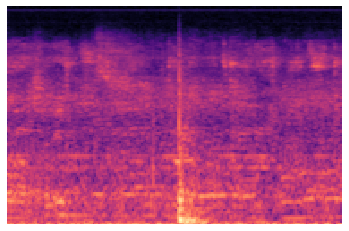

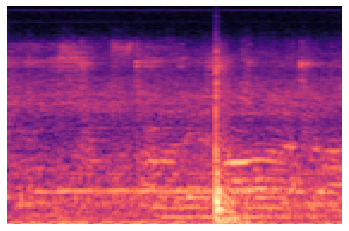

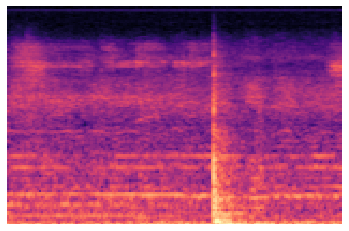

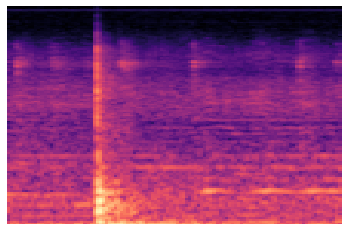

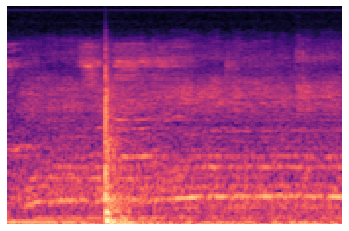

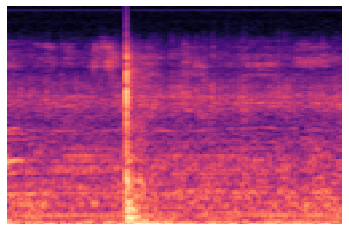

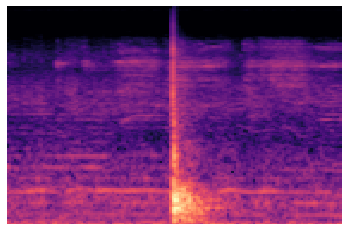

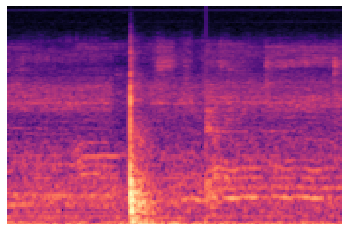

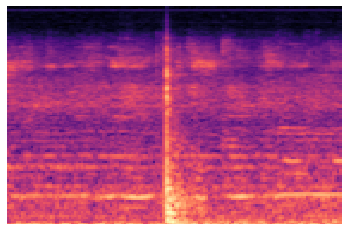

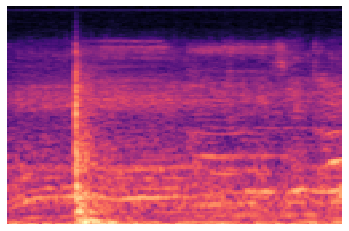

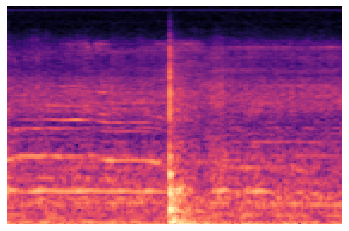

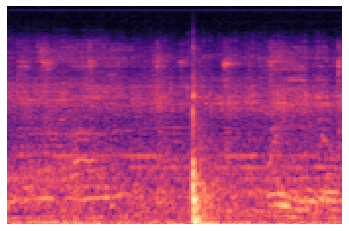

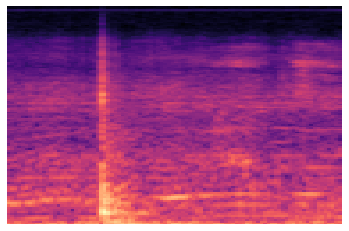

<Figure size 432x288 with 0 Axes>

In [13]:
for c in classes: 
    audio_path = path/f'{c}/'
    save_path_melspectogram = path/f'../train_melspecs/{c}'
    audio_to_spectrogram(audio_path, save_path_melspectogram)

# Raw
https://github.com/CVxTz/audio_classification/blob/master/LICENSE

In [14]:
input_length = 16000*2

def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

In [15]:
def load_audio_file(file_path, input_length=input_length):
    data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
    if len(data)>input_length:    
        max_offset = len(data)-input_length
        offset = np.random.randint(max_offset)
        data = data[offset:(input_length+offset)]
    else:
        max_offset = input_length - len(data)
        offset = np.random.randint(max_offset)
        data = np.pad(data, (offset, input_length - len(data) - offset), "constant")     
    data = audio_norm(data)
    return data

### Create csv file

In [16]:
x,y,filename = [],[],[]

for c in classes: 
    audio_path = path/f'{c}/'    
    for file_path in audio_path.iterdir():
        data = load_audio_file(file_path)
        x.append(data)
        y.append(c)
        filename.append(get_filename(file_path).split('.')[0])

In [17]:
df = pd.DataFrame(x)
df['filename'], df['classes'] = filename, y
df.head()

0         1         2         3         4         5         6  \
0  0.001126  0.000354  0.001508  0.006916  0.006379 -0.001834 -0.006520   
1  0.061929  0.061929  0.061929  0.061929  0.061929  0.061929  0.061929   
2 -0.011887 -0.011844 -0.013951 -0.013755 -0.002938  0.003159  0.007635   
3  0.024835  0.024835  0.024835  0.024835  0.024835  0.024835  0.024835   
4 -0.022613 -0.022613 -0.022613 -0.022613 -0.022613 -0.022613 -0.022613   

          7         8         9  ...     31992     31993     31994     31995  \
0 -0.003008 -0.000576 -0.005682  ... -0.000429 -0.002441 -0.005885 -0.009731   
1  0.061929  0.061929  0.061929  ...  0.061929  0.061929  0.061929  0.061929   
2  0.001455 -0.008555 -0.007942  ...  0.005184  0.027745  0.018881  0.008474   
3  0.024835  0.024835  0.024835  ...  0.024835  0.024835  0.024835  0.024835   
4 -0.022613 -0.022613 -0.022613  ... -0.022613 -0.022613 -0.022613 -0.022613   

      31996     31997     31998     31999  filename  classes  
0 -0.009476 -0.007364 -0.006357 -0.005674  blink_29    blink  
1  0.061929  0.061929  0.061929  0.061929   blink_7    blink  
2  0.005153  0.002735  0.009084  0.002010   blink_8    blink  
3  0.024835  0.024835  0.024835  0.024835  blink_28    blink  
4 -0.022613 -0.022613 -0.022613 -0.022613  blink_11    blink  

[5 rows x 32002 columns]

In [18]:
save_path = Path(f'{path}/../../csv')

In [19]:
df.to_csv(save_path/'raw.csv', index = None, header=True)

### Random selection of validation data 

In [24]:
import random
blink, kork, skive = random.sample(range(0, 29), 7), random.sample(range(30, 59), 7), random.sample(range(60, 89), 7)
idx = blink + kork + skive

In [25]:
df_valid = df['filename'].iloc[idx] 

In [26]:
df_valid.to_csv(save_path/'validation.csv', index = None, header=True)